In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [3]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [56]:
df=pd.read_csv('/content/drive/MyDrive/train_LZdllcl[1].csv')

In [58]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [59]:
df.shape

(54808, 14)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [61]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [62]:
con=df.select_dtypes(include=['int64','float64'])
cat=df.select_dtypes(include=['object','category'])

In [63]:
print(cat)
print(con)

              department     region         education gender  \
0      Sales & Marketing   region_7  Master's & above      f   
1             Operations  region_22        Bachelor's      m   
2      Sales & Marketing  region_19        Bachelor's      m   
3      Sales & Marketing  region_23        Bachelor's      m   
4             Technology  region_26        Bachelor's      m   
...                  ...        ...               ...    ...   
54803         Technology  region_14        Bachelor's      m   
54804         Operations  region_27  Master's & above      f   
54805          Analytics   region_1        Bachelor's      m   
54806  Sales & Marketing   region_9               NaN      m   
54807                 HR  region_22        Bachelor's      m   

      recruitment_channel  
0                sourcing  
1                   other  
2                sourcing  
3                   other  
4                   other  
...                   ...  
54803            sourcing  
54804  

In [64]:
df_edu_null=df[df['education'].isna()]

In [65]:
df_edu_not_null=df[df['education'].notna()]

In [66]:
con.corr()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005121,0.000437,0.004533,0.001274,-0.002501,0.008420,-0.000586,0.001206
no_of_trainings,-0.005121,1.000000,-0.081278,-0.063126,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,0.000437,-0.081278,1.000000,0.006008,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,0.004533,-0.063126,0.006008,1.000000,0.000253,0.351578,0.027738,0.075139,0.159320
length_of_service,0.001274,-0.057275,0.657111,0.000253,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,-0.002501,-0.045576,-0.025592,0.351578,-0.077693,1.000000,0.097000,0.078391,0.221582
awards_won?,0.008420,-0.007628,-0.008169,0.027738,-0.039927,0.097000,1.000000,0.072138,0.195871
avg_training_score,-0.000586,0.042517,-0.048380,0.075139,-0.038122,0.078391,0.072138,1.000000,0.181147
is_promoted,0.001206,-0.024896,-0.017166,0.159320,-0.010670,0.221582,0.195871,0.181147,1.000000


In [67]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [68]:
df_edu_null['KPIs_met >80%'].value_counts()

KPIs_met >80%
0    1814
1     595
Name: count, dtype: int64

In [69]:
df_edu_not_null['KPIs_met >80%'].value_counts()

KPIs_met >80%
0    33703
1    18696
Name: count, dtype: int64

In [70]:
df_edu_null['awards_won?'].value_counts()

awards_won?
0    2353
1      56
Name: count, dtype: int64

In [71]:
df_edu_not_null['awards_won?'].value_counts()

awards_won?
0    51185
1     1214
Name: count, dtype: int64

In [72]:
df_edu_not_null['education'].value_counts()

education
Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64

In [73]:
df_edu_not_null[(df_edu_not_null['awards_won?']==0) &( df_edu_not_null['KPIs_met >80%']==0)]['education'].value_counts()

education
Bachelor's          23377
Master's & above     9424
Below Secondary       482
Name: count, dtype: int64

In [74]:
df['education'].value_counts()

education
Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64

In [75]:
df['education']=df['education'].fillna("Bachelor's")

In [76]:
df['previous_year_rating'].value_counts()

previous_year_rating
3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: count, dtype: int64

In [77]:
df_rate_not_null=df[df['previous_year_rating'].notna()]

In [78]:
df_rate_null=df[df['previous_year_rating'].isna()]

In [79]:
df_rate_not_null['awards_won?'].value_counts()

awards_won?
0    49510
1     1174
Name: count, dtype: int64

In [80]:
df_rate_null['awards_won?'].value_counts()

awards_won?
0    4028
1      96
Name: count, dtype: int64

In [81]:
df_rate_not_null['KPIs_met >80%'].value_counts()

KPIs_met >80%
0    32835
1    17849
Name: count, dtype: int64

In [82]:
df_rate_null['KPIs_met >80%'].value_counts()

KPIs_met >80%
0    2682
1    1442
Name: count, dtype: int64

In [83]:
df_rate_not_null['previous_year_rating'].value_counts()

previous_year_rating
3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: count, dtype: int64

In [84]:
df['previous_year_rating']=df['previous_year_rating'].fillna(3.0)

In [85]:
df.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

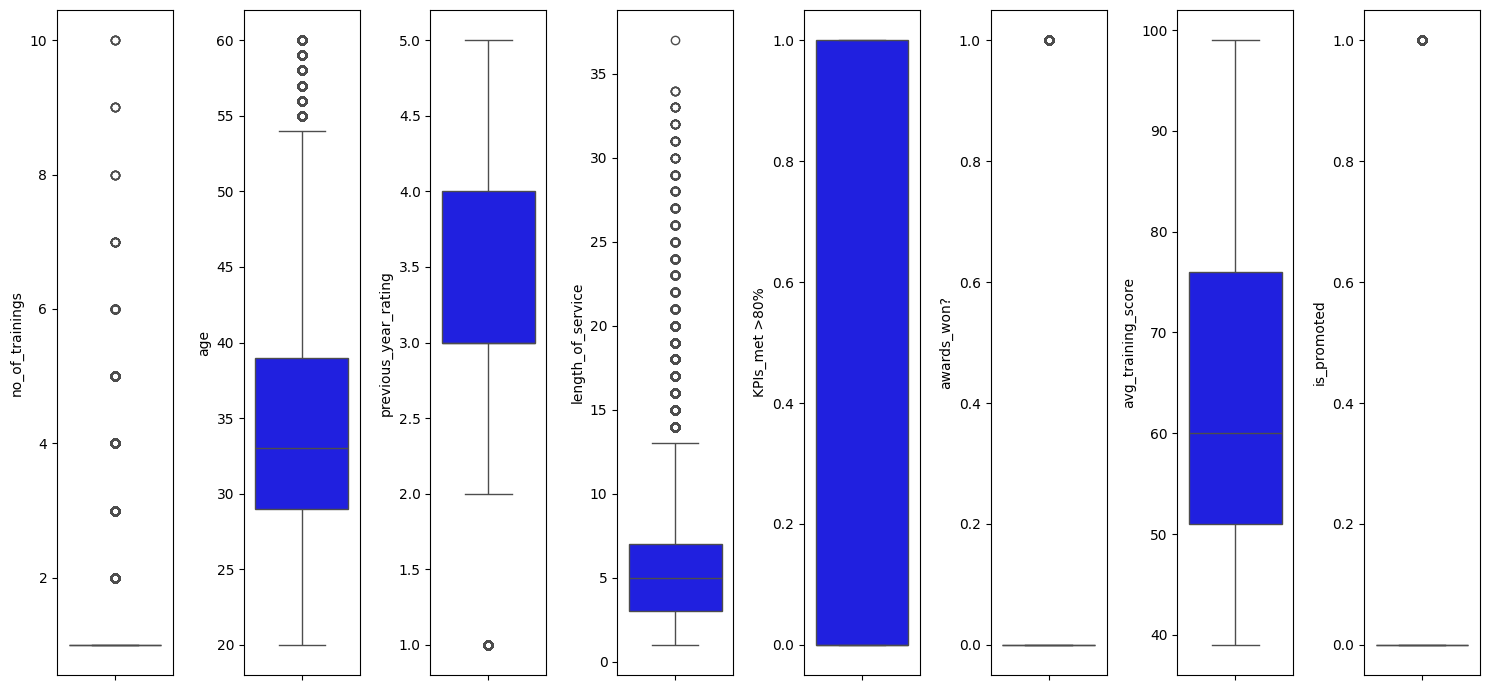

In [86]:
features = ['no_of_trainings','age','previous_year_rating','length_of_service','KPIs_met >80%','awards_won?','avg_training_score','is_promoted']
plt.figure(figsize=(15, 7))
for i in range(0, len(features)):
    plt.subplot(1, 8, i+1)
    sns.boxplot(y=df[features[i]],color='blue',)
    plt.tight_layout()

In [87]:
df['length_of_service'].skew()

1.738061458740809

In [88]:
log_data = np.log(df["length_of_service"])
sqrt_data = np.sqrt(df["length_of_service"])

In [89]:
log_data.skew()

-0.28990179567467633

In [90]:
sqrt_data.skew()

0.6595314372339438

In [91]:
df['length_of_service']=log_data

In [92]:
print(cat)

              department     region         education gender  \
0      Sales & Marketing   region_7  Master's & above      f   
1             Operations  region_22        Bachelor's      m   
2      Sales & Marketing  region_19        Bachelor's      m   
3      Sales & Marketing  region_23        Bachelor's      m   
4             Technology  region_26        Bachelor's      m   
...                  ...        ...               ...    ...   
54803         Technology  region_14        Bachelor's      m   
54804         Operations  region_27  Master's & above      f   
54805          Analytics   region_1        Bachelor's      m   
54806  Sales & Marketing   region_9               NaN      m   
54807                 HR  region_22        Bachelor's      m   

      recruitment_channel  
0                sourcing  
1                   other  
2                sourcing  
3                   other  
4                   other  
...                   ...  
54803            sourcing  
54804  

In [98]:
cat

,department,region,education,gender,recruitment_channel
0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,Operations,region_22,Bachelor's,m,other
2,Sales & Marketing,region_19,Bachelor's,m,sourcing
3,Sales & Marketing,region_23,Bachelor's,m,other
4,Technology,region_26,Bachelor's,m,other
...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,m,sourcing
54804,Operations,region_27,Master's & above,f,other
54805,Analytics,region_1,Bachelor's,m,other
54806,Sales & Marketing,region_9,NaN,m,sourcing


In [95]:
features = ['no_of_trainings','age','previous_year_rating','length_of_service','KPIs_met >80%','awards_won?','avg_training_score','is_promoted']

In [96]:
enc = OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform="pandas")
enc.fit(cat)
df_encoded=enc.transform(cat)


In [99]:
df_encoded

,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,...,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,education_nan,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
54804,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
54805,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
54806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [100]:
df_final=pd.concat([df[features],df_encoded],axis=1)

In [101]:
df_final

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Analytics,department_Finance,...,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,education_nan,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1,35,5.0,2.079442,1,0,49,0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,30,5.0,1.386294,0,0,60,0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1,34,3.0,1.945910,0,0,50,0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,2,39,1.0,2.302585,0,0,50,0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1,45,3.0,0.693147,0,0,73,0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,1,48,3.0,2.833213,0,0,78,0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
54804,1,37,2.0,1.791759,0,0,56,0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
54805,1,27,5.0,1.098612,1,0,79,0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
54806,1,29,1.0,0.693147,0,0,45,0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [102]:
x_pcm=df_final.drop(columns=['is_promoted'])
y_pcm=df_final['is_promoted']

In [104]:
df_final['is_promoted'].value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

In [105]:
sample_0=df_final[df_final['is_promoted']==0].sample(15000)
sample_1=df_final[df_final['is_promoted']==1]

In [107]:
df_algo=pd.concat([sample_0,sample_1],axis=0)

In [108]:
X=df_algo.drop(columns='is_promoted')
Y=df_algo['is_promoted']

In [110]:
from imblearn.over_sampling import SMOTE
from collections import Counter
sm = SMOTE(random_state=42)
X_res, Y_res = sm.fit_resample(X, Y)
print('Resampled dataset shape %s' % Counter(Y_res))

Resampled dataset shape Counter({0: 15000, 1: 15000})


In [111]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_res)
x_res=pd.DataFrame(scaler.transform(X_res))

In [119]:
X_res

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,...,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,education_nan,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1,34,3.000000,1.609438,0,0,48,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.000000,1.000000,1.000000,0.0,0.000000
1,1,24,3.000000,0.000000,1,0,79,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.000000,0.000000,1.000000,0.0,0.000000
2,1,34,5.000000,1.386294,1,0,62,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.000000,0.000000,1.000000,0.0,0.000000
3,1,33,1.000000,1.945910,0,0,71,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.000000,1.000000,1.000000,0.0,0.000000
4,1,27,1.000000,1.609438,0,0,86,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.000000,1.000000,1.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1,31,3.960188,1.775617,1,0,80,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.000000,0.000000,0.039812,0.0,0.960188
29996,1,43,4.640952,2.159561,0,0,61,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.000000,1.000000,1.000000,0.0,0.000000
29997,1,57,3.000000,2.809999,0,0,70,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.382923,0.617077,1.000000,0.0,0.000000
29998,1,24,3.000000,0.000000,1,0,60,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.000000,1.000000,1.000000,0.0,0.000000


In [113]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_res,Y_res,test_size=0.2, random_state=42)

In [114]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier (random_state=42)
rf_model = rf.fit(xtrain, ytrain)

In [125]:
importances = rf.feature_importances_
index=pd.DataFrame(importances).sort_values(ascending=False,by=0)
colum=X_res.columns[pd.DataFrame(importances).sort_values(ascending=False,by=0).index[0:5]]

In [123]:
importances

array([2.02891177e-02, 7.79853405e-02, 1.03727461e-01, 6.84754091e-02,
       9.56851621e-02, 1.15065204e-02, 1.83326844e-01, 1.20401716e-02,
       8.24749322e-03, 6.53378276e-03, 3.23423694e-03, 1.92652193e-02,
       1.60538488e-02, 4.79113813e-03, 3.12827014e-02, 1.53800390e-02,
       2.56547215e-03, 1.86844749e-03, 5.02307160e-03, 1.70451764e-03,
       9.20566332e-03, 3.14995731e-03, 8.52751023e-03, 4.16982844e-03,
       4.38720449e-03, 1.03962481e-04, 2.44461393e-03, 3.28535603e-02,
       2.46645106e-03, 1.14912308e-03, 3.18533678e-02, 5.26415470e-03,
       1.17503214e-03, 3.68326266e-03, 7.76996000e-03, 5.25113344e-03,
       6.07975897e-03, 3.74276754e-03, 1.56595811e-03, 2.30295894e-03,
       5.35023595e-03, 2.60707348e-03, 7.39038672e-04, 7.74908471e-04,
       1.46839423e-02, 1.88487980e-03, 2.42885032e-03, 2.19096813e-02,
       2.60667046e-03, 9.58886923e-04, 1.91068559e-02, 1.67734952e-03,
       1.64739482e-02, 4.11350493e-03, 1.57496655e-02, 1.59240331e-02,
      

In [128]:
index[0:6]

,0
6,0.183327
2,0.103727
4,0.095685
1,0.077985
3,0.068475
27,0.032854


In [127]:
colum

Index(['avg_training_score', 'previous_year_rating', 'KPIs_met >80%', 'age',
       'length_of_service'],
      dtype='object')

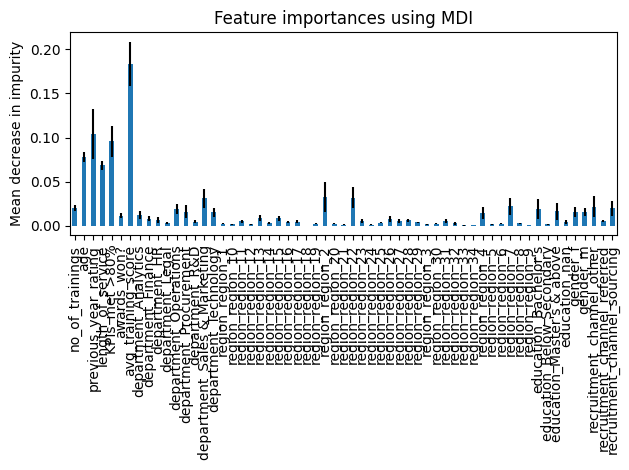

In [130]:
import pandas as pd

std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
forest_importances = pd.Series(importances, index=X_res.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [131]:
y_predicted = rf.predict(xtest)
y_predicted_train = rf.predict(xtrain)
#eval
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

print('\nclassification report')
print(classification_report(ytest, y_predicted))
print(accuracy_score(ytest, y_predicted))
confusion_matrix(ytest, y_predicted)


classification report
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      3048
           1       0.92      0.89      0.90      2952

    accuracy                           0.91      6000
   macro avg       0.91      0.91      0.91      6000
weighted avg       0.91      0.91      0.91      6000

0.9063333333333333


array([[2809,  239],
       [ 323, 2629]])

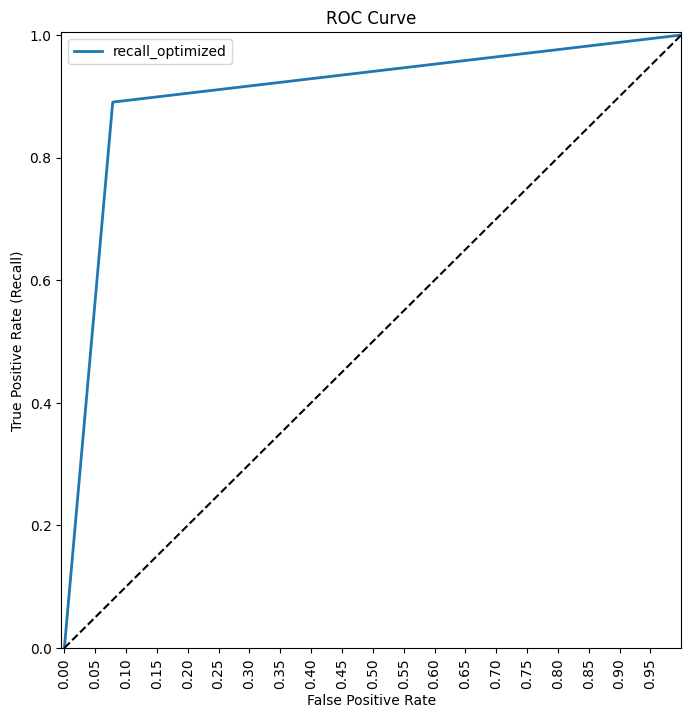

In [132]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def plot_roc_curve(fpr, tpr, label=None):
    """
    The ROC curve, modified from
    Hands-On Machine learning with Scikit-Learn and TensorFlow; p.91
    """
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')

#make roc auc curve
fpr, tpr, auc_thresholds = roc_curve(ytest, y_predicted)
# print('ROC AUC Score: ',str(round(auc(fpr, tpr)*100,1)), '%') # AUC of ROC
plot_roc_curve(fpr, tpr, 'recall_optimized')

In [141]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(x_res)

PCA(n_components=4)

In [142]:
x_transform=pca.transform(x_res)

In [143]:
x_final=pd.DataFrame(x_transform)

In [144]:
x_final.head()

,0,1,2,3
0,-0.471903,-0.934458,-0.113188,0.707521
1,-0.706443,0.653941,-0.894342,-0.274305
2,-0.799678,1.257402,0.305068,-0.662783
3,-0.547061,-0.487714,-0.225057,0.320372
4,-0.505982,-0.734957,-0.312276,0.165236


In [145]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_final, Y_res,test_size=0.2, random_state=42)

In [146]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier (random_state=42)
rf_model = rf.fit(xtrain, ytrain)

In [147]:
y_predicted = rf.predict(xtest)
y_predicted_train = rf.predict(xtrain)
#eval
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

print('\nclassification report')
print(classification_report(ytest, y_predicted))
print(accuracy_score(ytest, y_predicted))
confusion_matrix(ytest, y_predicted)


classification report
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      3048
           1       0.80      0.81      0.80      2952

    accuracy                           0.80      6000
   macro avg       0.80      0.80      0.80      6000
weighted avg       0.80      0.80      0.80      6000

0.8035


array([[2438,  610],
       [ 569, 2383]])

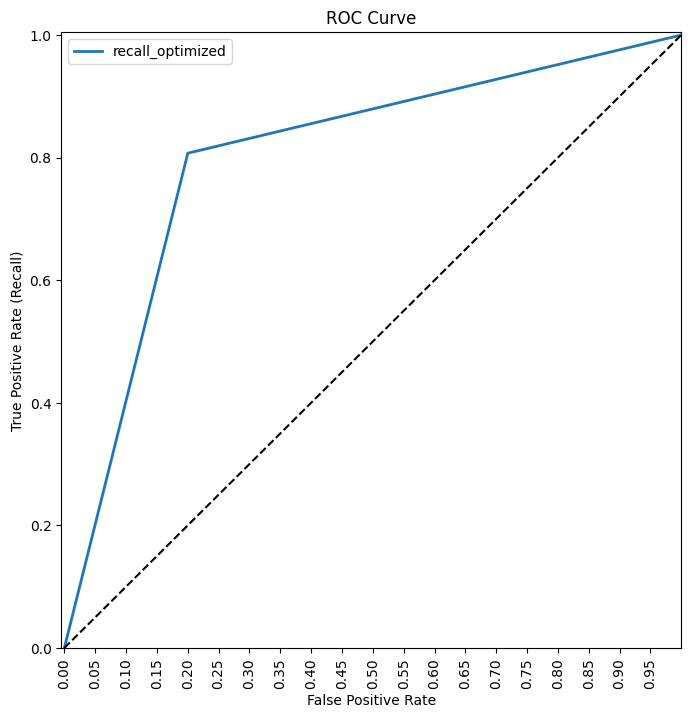

In [148]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def plot_roc_curve(fpr, tpr, label=None):
    """
    The ROC curve, modified from
    Hands-On Machine learning with Scikit-Learn and TensorFlow; p.91
    """
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')

#make roc auc curve
fpr, tpr, auc_thresholds = roc_curve(ytest, y_predicted)
# print('ROC AUC Score: ',str(round(auc(fpr, tpr)*100,1)), '%') # AUC of ROC
plot_roc_curve(fpr, tpr, 'recall_optimized')